<a href="https://colab.research.google.com/github/ayuti/project_list/blob/master/lstm_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [379]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [380]:
df = pd.read_excel(r'category_nsr_aug.xlsx')

df.head(5)


,PSTG. DATE,Category,NSR
0,2021-04-02,HCV,20.014434
1,2021-04-02,HCV,25.567178
2,2021-04-02,HCV,25.833700
3,2021-04-02,HCV,25.373057
4,2021-04-02,HCV,21.368760


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   PSTG. DATE  1074 non-null   datetime64[ns]
 1   Category    1074 non-null   object        
 2   NSR         1074 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.3+ KB


In [382]:
df['Category'] = df['Category'].astype('string')

df['NSR'] = df['NSR'].astype(int)

df.dtypes


PSTG. DATE    datetime64[ns]
Category              string
NSR                    int64
dtype: object

In [383]:
df['Category'].value_counts()

HCV      471
ICV      271
LCV      239
N LCV     68
Bus       25
Name: Category, dtype: Int64

In [384]:
# Features
features_considered = ['PSTG. DATE', 'Category','NSR']

features = df[features_considered]
#features.index = df['Date Time']
features.head()


,PSTG. DATE,Category,NSR
0,2021-04-02,HCV,20
1,2021-04-02,HCV,25
2,2021-04-02,HCV,25
3,2021-04-02,HCV,25
4,2021-04-02,HCV,21


In [385]:
category_df=features.set_index('PSTG. DATE').groupby('Category').resample('D').sum()
category_df

NSR
Category PSTG. DATE     
Bus      2021-04-07   11
         2021-04-08    0
         2021-04-09    0
         2021-04-10    0
         2021-04-11    0
...                  ...
N LCV    2021-08-27    0
         2021-08-28   20
         2021-08-29    0
         2021-08-30   30
         2021-08-31   96

[730 rows x 1 columns]

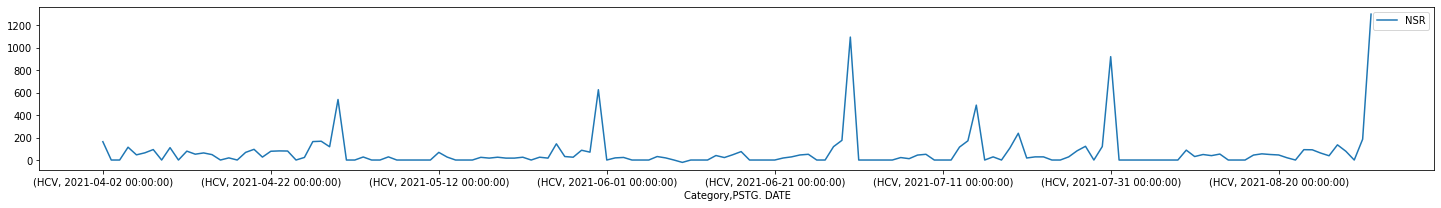

In [386]:
plt.rcParams["figure.figsize"] = (25,3)
category_df.query('Category=="HCV"')[['NSR']].plot()


In [387]:
hcv_df=category_df.query('Category=="HCV"')[['NSR']]

hcv_df

NSR
Category PSTG. DATE      
HCV      2021-04-02   163
         2021-04-03     0
         2021-04-04     0
         2021-04-05   114
         2021-04-06    46
...                   ...
         2021-08-27   135
         2021-08-28    78
         2021-08-29     0
         2021-08-30   185
         2021-08-31  1297

[152 rows x 1 columns]

In [388]:
len(hcv_df)


152

In [389]:
test_index=40
train_data=hcv_df.iloc[:-test_index]
test_data=hcv_df.iloc[-test_index:]

print(len(train_data),len(test_data))

112 40


In [390]:
test_data.head(5)

NSR
Category PSTG. DATE     
HCV      2021-07-23   28
         2021-07-24    0
         2021-07-25    0
         2021-07-26   28
         2021-07-27   82

In [391]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaled_train_data=scaler.fit_transform(train_data)
scaled_test_data=scaler.transform(test_data)


In [392]:
length=3
batch_size=1
features=scaled_train_data.shape[1]


In [393]:
# Importing the keras library and the TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

time_series_generator=TimeseriesGenerator(scaled_train_data,scaled_train_data,length=length,batch_size=batch_size)


In [394]:
# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers


In [395]:
import tensorflow as tf
initializer = tf.keras.initializers.he_uniform(seed=0)
# Initially, the network model is defined 
model = Sequential()

# Hidden layer neurons are chosen to be 51 equal to the defined length (number of past time series data per batch)
# Selected Activation function has been the rectified linear unit
model.add(LSTM(51, activation='relu', input_shape=(length,features),kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The output layer consists of 4 neuron (one neuron for each input feature) with a 'sigmoid' activation fuction 
model.add(Dense(features,activation='sigmoid',kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and
# second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')


In [396]:
model.fit(time_series_generator,epochs=20)


Epoch 1/20
109/109 [==============================] - 2s 4ms/step - loss: 0.1091
Epoch 2/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 3/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 4/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 5/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 6/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 7/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0152
Epoch 8/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 9/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0146
Epoch 10/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 11/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0147
Epoch 12/20
109/109 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 13/20
109/109 [====

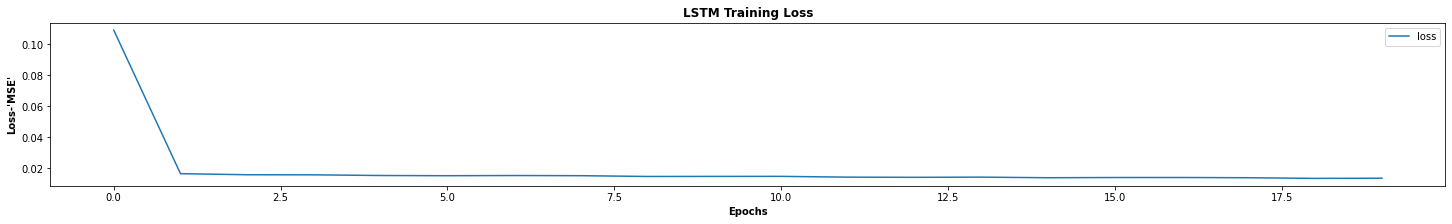

In [397]:
# Training loss plot
loss = pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');


In [398]:
# Determining all LSTM predicted values so as to compare them with the actual test values 
n_features = scaled_train_data.shape[1]
test_outputs = []
batch = scaled_train_data[-length:].reshape((1, length, n_features))

for i in range(len(test_data)):
    test_out = model.predict(batch)[0]
    test_outputs.append(test_out) 
    batch = np.append(batch[:,1:,:],[[test_out]],axis=1)


In [399]:
# Applying the inverse_transform function to the test_outputs to get their original values
true_outputs = scaler.inverse_transform(test_outputs)


In [400]:
# Converting the true_outputs from np.ndarray to pandas dataframe
true_outputs = pd.DataFrame(data=true_outputs,columns=test_data.columns,index=test_data.index)


In [401]:
# Predicted values - first 5 predictions
true_outputs.head(5)


NSR
Category PSTG. DATE            
HCV      2021-07-23    3.785766
         2021-07-24   52.261339
         2021-07-25   60.283670
         2021-07-26   80.402043
         2021-07-27  122.057219

for hcv prediction on test data

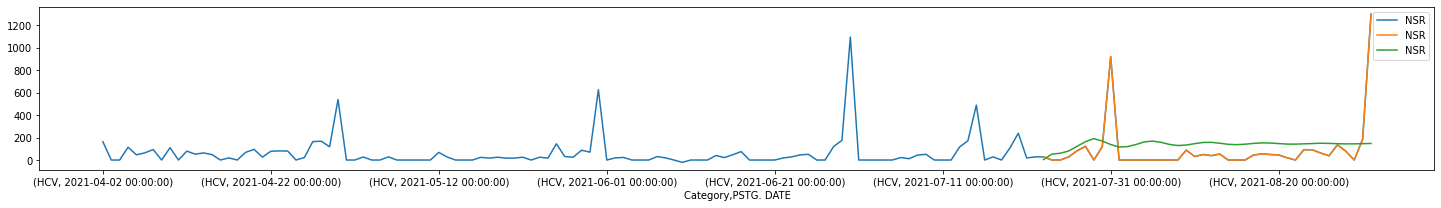

In [402]:
#n_lcv_df['NSR'][:-test_index].plot(linestyle='--',marker='.',label='Train',color='r')
#test_data['NSR'].plot(linestyle='--',marker='.',label='Targets',color='g')
#true_outputs['NSR'].plot(linestyle='--',marker='.',label='Predictions',color='b')
pd.concat([hcv_df['NSR'],test_data['NSR'],true_outputs['NSR']],axis=1).plot()


In [403]:
#pip install chart_studio

In [404]:
train_data1=hcv_df
len(train_data1)
test_data1=90
train_data1

NSR
Category PSTG. DATE      
HCV      2021-04-02   163
         2021-04-03     0
         2021-04-04     0
         2021-04-05   114
         2021-04-06    46
...                   ...
         2021-08-27   135
         2021-08-28    78
         2021-08-29     0
         2021-08-30   185
         2021-08-31  1297

[152 rows x 1 columns]

In [405]:
train_data1 = train_data1.reset_index()  

In [406]:

train_data_new=train_data1.append(pd.DataFrame({'PSTG. DATE': pd.date_range(start=train_data1['PSTG. DATE'].iloc[-1], periods= 80, freq='d'),'Category':'HCV'}),ignore_index = True)


In [407]:
train_data_new=train_data_new.set_index('PSTG. DATE').groupby('Category').resample('D').sum()
#train_data_new

In [408]:
#train_data_new.info()
#train_data_new.info()
train_data_new['NSR'] = train_data_new['NSR'].astype(int)


In [409]:
test_index=89
full_train=train_data_new.iloc[:-test_index]
full_test=train_data_new.iloc[-test_index:]


In [410]:
full_test    #created dataframe with future dates

NSR
Category PSTG. DATE     
HCV      2021-08-22    0
         2021-08-23   92
         2021-08-24   91
         2021-08-25   62
         2021-08-26   38
...                  ...
         2021-11-14    0
         2021-11-15    0
         2021-11-16    0
         2021-11-17    0
         2021-11-18    0

[89 rows x 1 columns]

In [411]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaled_train_data_new=scaler.fit_transform(full_train)
scaled_test_data_new=scaler.transform(full_test)


In [412]:
length=3
batch_size=1
features=scaled_train_data_new.shape[1]

# Importing the keras library and the TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
time_series_generator=TimeseriesGenerator(scaled_train_data_new,scaled_train_data_new,length=length,batch_size=batch_size)



# Importing the necessary libraries to create/construct the neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers




import tensorflow as tf
initializer = tf.keras.initializers.he_uniform(seed=0)
# Initially, the network model is defined 
model = Sequential()


In [413]:

# Selected Activation function has been the rectified linear unit
model.add(LSTM(51, activation='relu', input_shape=(length,features),kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The output layer consists of 4 neuron (one neuron for each input feature) with a 'sigmoid' activation fuction 
model.add(Dense(features,activation='sigmoid',kernel_initializer=initializer,
                     bias_initializer=initializers.Constant(0.01)))
# The model is compiled with selected loss function= 'mse', whereas the selected optimizer is 'adam' with a learning rate
# of 0.001, epsilon=1e-8 and with the default values of the exponential decay rates for the first and
# second moment estimates
opt = tf.keras.optimizers.Adam(learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-8)

model.compile(optimizer=opt, loss='mse')




model.fit(time_series_generator,epochs=20)


Epoch 1/20
139/139 [==============================] - 2s 4ms/step - loss: 0.1051
Epoch 2/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0174
Epoch 3/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0172
Epoch 4/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0169
Epoch 5/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0167
Epoch 6/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0167
Epoch 7/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0164
Epoch 8/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0162
Epoch 9/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0164
Epoch 10/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0162
Epoch 11/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0156
Epoch 12/20
139/139 [==============================] - 1s 4ms/step - loss: 0.0161
Epoch 13/20
139/139 [====

In [414]:
# Determining all LSTM predicted values so as to compare them with the actual test values 
n_features = scaled_train_data.shape[1]
test_outputs = []
batch = scaled_train_data_new[-length:].reshape((1, length, n_features))

for i in range(len(full_test)):
    test_out = model.predict(batch)[0]
    test_outputs.append(test_out) 
    batch = np.append(batch[:,1:,:],[[test_out]],axis=1)


# Applying the inverse_transform function to the test_outputs to get their original values
true_outputs1 = scaler.inverse_transform(test_outputs)



# Converting the true_outputs from np.ndarray to pandas dataframe
true_outputs1 = pd.DataFrame(data=true_outputs1,columns=full_test.columns,index=full_test.index)

# Predicted values 

true_outputs1.head(10)



NSR
Category PSTG. DATE            
HCV      2021-08-22   94.662149
         2021-08-23  106.001138
         2021-08-24  138.783272
         2021-08-25  198.492624
         2021-08-26  198.767352
         2021-08-27  188.433288
         2021-08-28  176.714460
         2021-08-29  179.592782
         2021-08-30  183.834752
         2021-08-31  185.654133

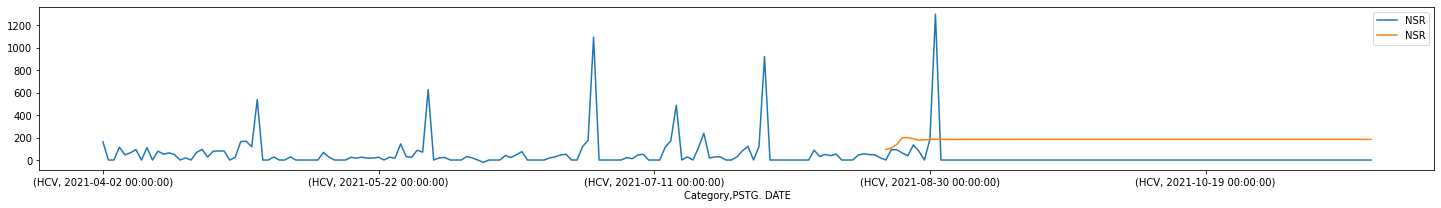

In [415]:
pd.concat([train_data_new['NSR'],true_outputs1['NSR']],axis=1).plot()
